# The art of war 

In [2]:
# import of librairies
import time
import pandas as pd
from snscrape.modules.twitter import TwitterSearchScraper

In [28]:
# Vincent function for scrapping tweeter
class Scraper:

    def __init__(self, format=""):
        
        """
        À l'origine le scraper devait aussi gérer le JSON, d'où le paramètre format.
        Valeurs possibles : 
        - "csv" pour enregistrer les résultats dans un csv
        - n'importe quelle autre valeur si vous voulez juste afficher les résultats dans la console
        """

        self.supported_formats = ["csv"]
        if format in self.supported_formats:
            self.format = format
            self.display_only = False
        else:
            print(f"WARNING: format {format} is not supported. Switching to display only")
            self.display_only = True
            return



    def scrape(self, filepath=None, query=None, results_count=0, language="en"):
        
        """
        Paramètres :
        - filepath : chemin vers le fichier où vous voulez enregistrer vos données
        - query : la recherche que vous voulez effectuer
        - results_count : le nombre de résultats voulus
        - language : la langue de recherche ("en" pour anglais, "fr" pour français)
        """


        tweets_max_time = int(time.time()) - 604800

        search = query + " lang:" + language + " since:2022-06-01"
        required_fields = ["id", "url", "date", "renderedContent", "hashtags", "replyCount", "retweetCount", "likeCount"]

        scraped_data = []
        tweets_processed = 0
        chunk_size = 10000

        while tweets_processed < results_count:
            scraping_results = TwitterSearchScraper(search).get_items()
            while tweets_processed < results_count:
                try:
                    tweet = next(scraping_results)
                    tweet.renderedContent = '''%s''' % tweet.renderedContent
                    if tweet.hashtags:
                        tweet.hashtags = str(tweet.hashtags).lstrip('[').rstrip(']')
                        tweet.hashtags = '''%s''' % tweet.hashtags

                except (TypeError, KeyError):
                    continue
                except StopIteration:
                    tweets_max_time -= 3000
                    search = query + " lang:" + language + " until_time:" + str(tweets_max_time)
                    break
                tweets_processed+=1
                if tweets_processed % 100 == 0:
                    print(str(tweets_processed) + " tweets scraped")
                scraped_data.append(tweet)
                if tweets_processed % chunk_size == 0:
                    print("Saving data chunk")
                    scraped_data = pd.DataFrame(scraped_data)[required_fields]
                    self.output(scraped_data)
                    scraped_data = []

        print("Final save")
        if scraped_data != []:
            scraped_data = pd.DataFrame(scraped_data)[required_fields]
            self.output(scraped_data, filepath)

    def output(self, scraped_data, filepath):

        """Ici, on enregistre ou affiche les résultats"""
        if self.display_only:
            print(scraped_data)
        elif self.format == "csv":
            scraped_data.to_csv(filepath, index=False, sep ='|')

In [18]:
book_tweet = Scraper(format="csv")
book_tweet.scrape(query="the Art of War", language="en", results_count=1000, filepath="art_of_war.csv")

100 tweets scraped
200 tweets scraped
300 tweets scraped
400 tweets scraped
500 tweets scraped
600 tweets scraped
700 tweets scraped
800 tweets scraped
900 tweets scraped
1000 tweets scraped
Final save


In [2]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('art_of_war.csv', delimiter = '|')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1000 non-null   int64 
 1   url              1000 non-null   object
 2   date             1000 non-null   object
 3   renderedContent  1000 non-null   object
 4   hashtags         45 non-null     object
 5   replyCount       1000 non-null   int64 
 6   retweetCount     1000 non-null   int64 
 7   likeCount        1000 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 62.6+ KB


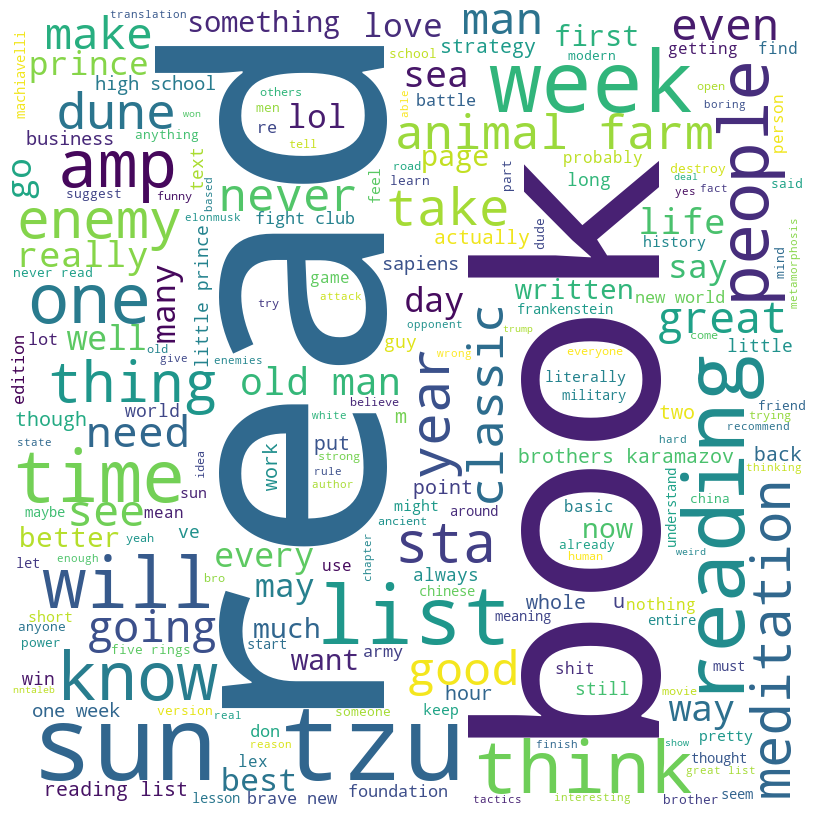

In [32]:
comment_words = ''
stopwords = set(STOPWORDS)
stop_words = ["https", "co", "RT","twitter","t","amazon","war","art","dp","lexfridman","s"] + list(STOPWORDS)


for val in df.renderedContent:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [35]:
import nltk

In [46]:
word_data = "The best performance can bring in sky high success."
nltk_tokens = nltk.word_tokenize(word_data)  	

print(list(nltk.bigrams(nltk_tokens)))

[('The', 'best'), ('best', 'performance'), ('performance', 'can'), ('can', 'bring'), ('bring', 'in'), ('in', 'sky'), ('sky', 'high'), ('high', 'success'), ('success', '.')]


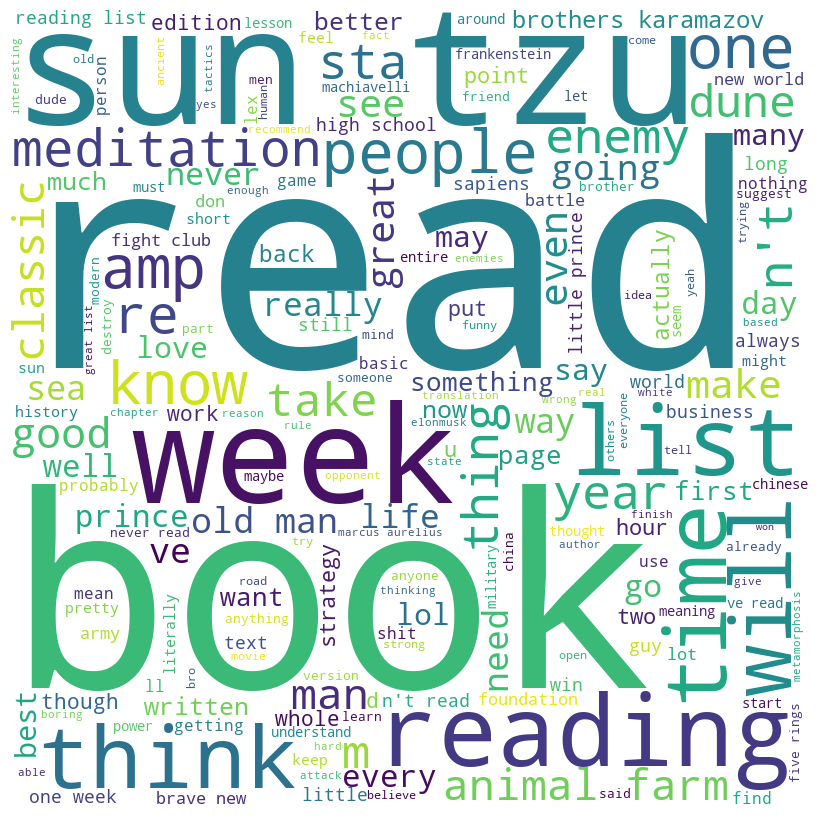

In [52]:
comment_words = ''
stopwords = set(STOPWORDS)
stop_words = ["https", "co", "RT","twitter","t","amazon","war","art","dp","lexfridman","s"] + list(STOPWORDS)


for val in df.renderedContent:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = nltk.word_tokenize(val)
    bigram = nltk.bigrams(tokens)
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    bigram = nltk.bigrams(tokens)
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [54]:
import nltk
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
fourgram_measures = nltk.collocations.QuadgramAssocMeasures()
finder = BigramCollocationFinder.from_words(bigram)
finder.nbest(bigram_measures.pmi, 10)

[((',', 'that'), ('that', 'one')),
 (('@', 'lexfridman'), ('lexfridman', 'the')),
 (('a', 'week'), ('week', ',')),
 (('art', 'of'), ('of', 'war')),
 (('in', 'a'), ('a', 'week')),
 (('is', 'thick'), ('thick', 'reading')),
 (('lexfridman', 'the'), ('the', 'art')),
 (('of', 'war'), ('war', 'in')),
 (('one', 'is'), ('is', 'thick')),
 (('that', 'one'), ('one', 'is'))]